# Logistic Regression


## Introduction
In this Jupyter notebook, we will employ the Gradient Descent Logistic Regression model to investigate the Titanic dataset. Our aim is to explore the potential of logistic regression in predicting categorical outcomes from this dataset, which could involve identifying whether passages survive or not based on existing information(feature).By applying logistic regression, we hope to uncover underlying patterns within the surviving features that influence these outcomes.

## Dataset 
The Titanic dataset contains demographic and passenger information from 891 of the 2,224 passengers and crew on board the Titanic,such as survived, pclass, sex, age and so on.In this case, we only select five features: pclass,sex,age,fare,embarked with the response survived(0 or 1).

Loading Titanic dataset

In [11]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Load the dataset
titanic = sns.load_dataset('titanic')

# Drop rows with missing 'embarked', 'deck', and 'age' data for simplicity
titanic = titanic.dropna(subset=['embarked', 'age', 'deck'])

# Select features and target
X = titanic[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = titanic['survived']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Display the first few rows of the prepared dataset
print(X.head())
print(y.head())


    pclass   age     fare  sex_male  embarked_Q  embarked_S
1        1  38.0  71.2833     False       False       False
3        1  35.0  53.1000     False       False        True
6        1  54.0  51.8625      True       False        True
10       3   4.0  16.7000     False       False        True
11       1  58.0  26.5500     False       False        True
1     1
3     1
6     0
10    1
11    1
Name: survived, dtype: int64


In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)


Model evaluation

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' if you have binary classification
print(f'F1 Score: {f1}')

# For multi-class classification, you might want to compute the F1 score for each class
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for label imbalance
print(f'Weighted F1 Score: {f1_weighted}')

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5818181818181818
F1 Score: 0.6349206349206349
Weighted F1 Score: 0.5852077001013172
              precision    recall  f1-score   support

           0       0.48      0.55      0.51        22
           1       0.67      0.61      0.63        33

    accuracy                           0.58        55
   macro avg       0.57      0.58      0.57        55
weighted avg       0.59      0.58      0.59        55

[[12 10]
 [13 20]]


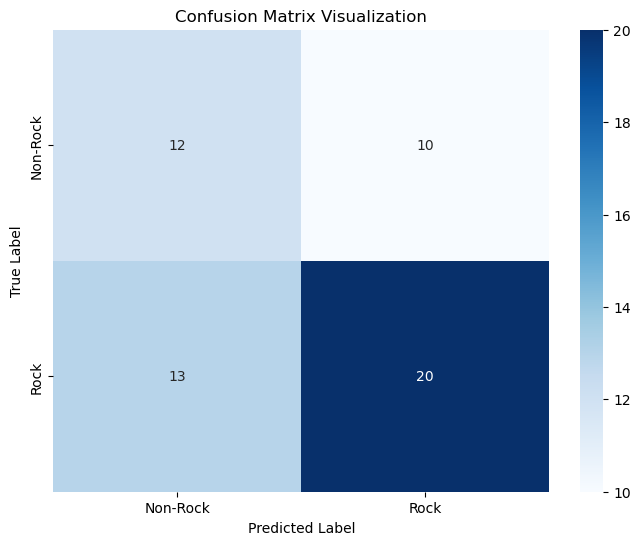

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined and contain the true labels and the predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Rock', 'Rock'], yticklabels=['Non-Rock', 'Rock'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

The performance metrics given indicate the following about the logistic regression model:

1.Accuracy (0.58 or 59%): This metric tells us that 59% of the total predictions made by the model were correct. While this is better than random guessing, it suggests that there's significant room for improvement.

2.F1 Score (0.63 for class 1): The F1 score for the positive class (which we can assume to be survivors) is relatively higher than the F1 score for the negative class. This score is the harmonic mean of precision and recall, giving us a sense of the balance between these two metrics.

3.Weighted F1 Score (0.58): This takes into account the F1 score of each class, weighted by the number of samples in each class. It is lower than the F1 score for the positive class, indicating that the model is performing worse on the less represented class.

The confusion matrix provides a deeper insight:

**Confusion Matrix:**

[12 10]: Of the 22 albums that were not Rock, the model correctly identified 12 as not survivors (true negatives), but incorrectly labeled 12 as survivors (false positives).

[13 20]: Of the 33 Rock albums, the model correctly identified 20 as survivors (true positives), but 29 were incorrectly labeled as not survivors (false negatives).

## Conclusion

In summary, while the model is reasonably good at identifying survivors, it struggles with identifying non-survivors, often confusing them with survivors. The model is particularly weak in terms of precision for non-survivors, indicating a tendency to label passages as survivors even when they are not. This could potentially be addressed by gathering more balanced data, feature engineering, or trying different model architectures or hyperparameters.